In [1]:
#기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')

In [3]:
#머신러닝 패키지 추가
import statsmodels.api as sm    #안쓸걸
import sklearn as sk

In [4]:
#### 전체 데이터 로드

In [5]:
# 농어 전체 데이터 로드

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                        21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                        23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                        27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                        39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                        44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                        115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                        150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                        218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                        556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                        850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                        1000.0])

In [6]:
#### 농어 길이와 무게간의 상관관계 확인

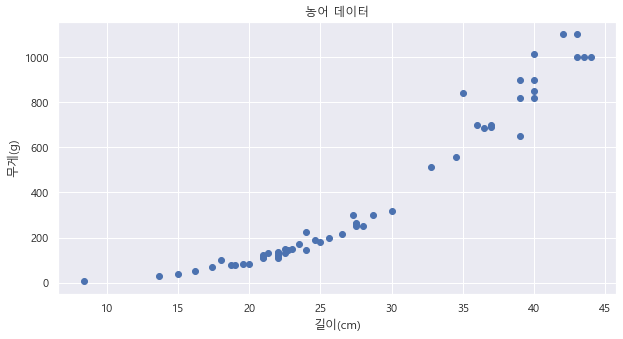

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(x=perch_length, y=perch_weight)
plt.xlabel('길이(cm)')
plt.ylabel('무게(g)')
plt.title('농어 데이터')
plt.show()

In [8]:
#### 훈련세트와 테스트세트 분리

In [21]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [28]:
# 훈련 세트는 2차원이어야 하므로 reshape로 조정. numpy의 row_stack으로도 가능
train_input = train_input.reshape(-1,1)     #test_input =np.row_stack((test_input))
train_input.shape

(42, 1)

In [29]:
test_input = test_input.reshape(-1,1)       #test_input =np.row_stack((test_input)) 
test_input.shape

(14, 1)

### 결정계수($R^2$)

- Tex 문법

In [24]:
# k-최근접이웃회귀 모델 훈련 패키지
from sklearn.neighbors import KNeighborsRegressor

In [25]:
knr = KNeighborsRegressor()

In [26]:
# KNN 훈련 | 반드시 훈련세트는 2차원배열 되어야함!
knr.fit(X=train_input, y=train_target)

KNeighborsRegressor()

In [27]:
knr.score(X=test_input, y=test_target)
# 결정계수 = 0.9928

0.992809406101064

### MAE

Mean Absolue Error

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
# 테스트세트에 대한 예측을 만듦
test_predict = knr.predict(test_input)

In [32]:
# 실제 테스트할 농어 길이 리스트
test_input

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5],
       [40. ],
       [30. ],
       [24.6],
       [39. ],
       [21. ],
       [43.5],
       [16.2],
       [28. ],
       [27.3]])

In [33]:
# 예측된 무게 리스트
test_predict

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [34]:
# 실제 측정된 농어 무게 리스트
test_target

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [36]:
# 테스트 타겟세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(y_true=test_target, y_pred=test_predict)
mae

19.157142857142862

결과에서 예측이 평균적으로 19.15g 정도 타깃값과 다르게 예측되었음

#### 과소적합(underfitting)

- 훈련세트보다 테스트세트의 테스트결과(결정계수값)이 좋을 경우
- 훈련세트와 테스트세트의 결정계수값이 모두 낮은 경우

In [37]:
# 테스트 세트로 확인한 결정계수와 다른 수치를 보임
knr.score(X=train_input, y=train_target)

0.9698823289099254

In [38]:
knr.score(test_input, test_target)

0.992809406101064

#### 과대적합(overfitting)

- 훈련세트로 나온 결정계수는 매우좋음, 반면 테스트세트에서 나온 결정계수가 매우 나쁠 때

### 현재의 과소적합 문제를 해결할 방법

모델을 조금 더 복잡하게 만들면 된다 -> n_neighbors 기본 5

In [39]:
# 최근접 이웃의 갯수를 줄임
knr.n_neighbors =3 #원래 5

#재훈련
knr.fit(train_input,train_target)
knr.score(test_input, test_target)

0.9746459963987609

In [40]:
knr.score(train_input,train_target)
# 과소적합 문제 해결함

0.9804899950518966

#### 확인문제

In [41]:
# KNN 회귀 객체를 만듦
knr = KNeighborsRegressor()

In [42]:
# 5~ 45까지 x좌표를 생성
x = np.arange(5, 45).reshape(-1,1)
x

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44]])

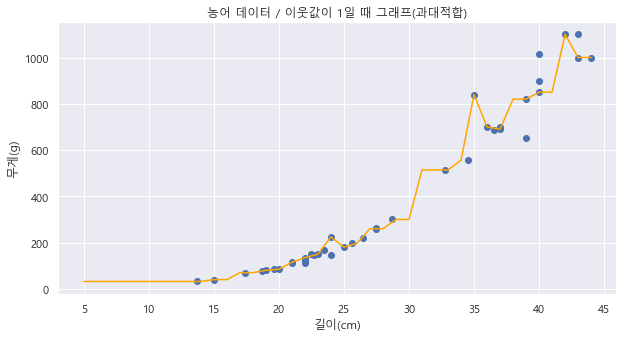

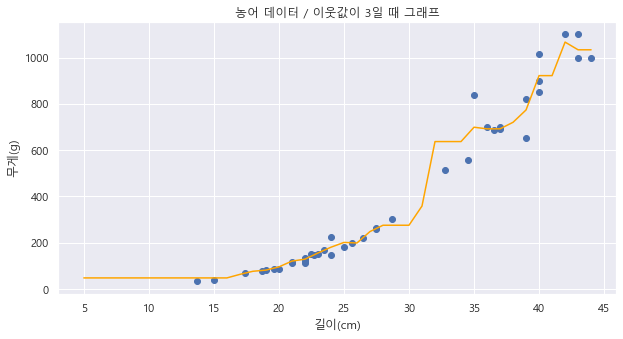

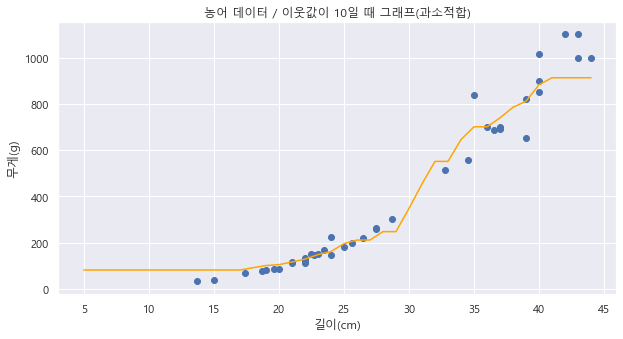

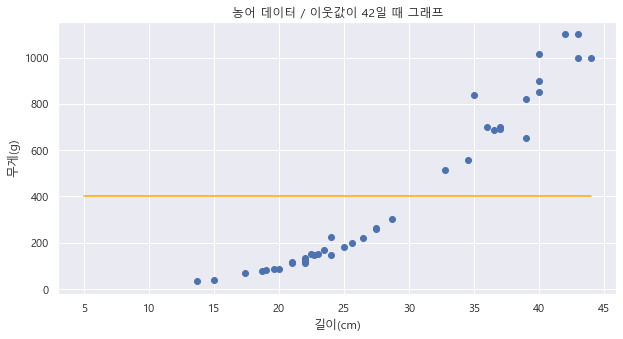

In [53]:
# k-이웃값을  1, 5, 10으로 변경하면서 예측을 하고 차트그리기
for n in [1, 3, 10, 42]:        # randomstate
    knr.n_neighbors =n
    knr.fit(train_input, train_target)

    # x에 대한 예측 도출
    pred = knr.predict(x)
    # 훈련세트와 예측결과를 산점도에 표시
    plt.figure(figsize=(10,5))
    plt.scatter(x= train_input, y= train_target)
    plt.plot(x, pred, color = 'orange')
    title = f'농어 데이터 / 이웃값이 {n}일 때 그래프'
    if n == 1:
        title += '(과대적합)'
    elif n==10:
        title += '(과소적합)'
    plt.title(title)
    plt.xlabel('길이(cm)')
    plt.ylabel('무게(g)')
    plt.show()